## Homework 4 Assignment 2 


Prepared by eb3237

Instructions: 

For Assignment 2 you should design your own investigation into the citibike data.
Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. 
At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. 
Categorical cn be anhything that can be punt into classes (e.g. day/night, male/female, 2014/2015/2016.... 
as long as you set up your experiment the proper way!)
Choose the significance threshold
Clearly state they Null and Alternate hypothesis
Wrangle the data so that it is ready for your analysis.

## Idea:  

Men comute longer distances than women during the weekdays (working days, Monday-Friday) 


## Null Hypothesis:

The average trip time of men biking on weekdays is the same or lower than the average trip time of women biking on weekdays 

## Alternative Hypothesis:

The average trip time of men biking on weekdays is more than the average trip time of women biking on weekdays. 

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

import os
import json


Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2018


In [2]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system
### this code cell does a lot of things: looks for existing files, download a file if none is there, unzips it, moves it.
### you do not have to have a code cell this complicated. 
### As long as 
### 1) your research is reproducible: we can access the same file as you without having to ask you for the file
### 2) and your data is stored in a directory pointed to by the env variable PUIDATA 
### you will be fine. We already explored how to download data in other notebooks!

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201306'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])

# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1,2013-06-01 00:00:01
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1,2013-06-01 00:00:08
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0,2013-06-01 00:00:44
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1,2013-06-01 00:01:04
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1,2013-06-01 00:01:22


In [5]:
#looking at the data
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
#just experimenting to see the trips near Broadway
df[df['start station name'].str.contains('Broadway')]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1,2013-06-01 00:00:01
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1,2013-06-01 00:00:08
6,2057,2013-06-01 00:02:33,2013-06-01 00:36:50,285,Broadway & E 14 St,40.734546,-73.990741,532.0,S 5 Pl & S 5 St,40.710451,-73.960876,15693,Subscriber,1991.0,1,2013-06-01 00:02:33
13,924,2013-06-01 00:05:21,2013-06-01 00:20:45,486,Broadway & W 29 St,40.746201,-73.988557,521.0,8 Ave & W 31 St N,40.750967,-73.994442,16608,Customer,NaN,0,2013-06-01 00:05:21
18,1818,2013-06-01 00:08:10,2013-06-01 00:38:28,257,Lispenard St & Broadway,40.719392,-74.002472,500.0,Broadway & W 51 St,40.762288,-73.983362,20349,Customer,NaN,0,2013-06-01 00:08:10
19,682,2013-06-01 00:08:53,2013-06-01 00:20:15,486,Broadway & W 29 St,40.746201,-73.988557,521.0,8 Ave & W 31 St N,40.750967,-73.994442,20176,Customer,NaN,0,2013-06-01 00:08:53
57,960,2013-06-01 00:20:29,2013-06-01 00:36:29,79,Franklin St & W Broadway,40.719116,-74.006667,294.0,Washington Square E,40.730494,-73.995721,15533,Subscriber,1983.0,1,2013-06-01 00:20:29
59,627,2013-06-01 00:21:35,2013-06-01 00:32:02,465,Broadway & W 41 St,40.755136,-73.986580,465.0,Broadway & W 41 St,40.755136,-73.986580,19411,Subscriber,1976.0,1,2013-06-01 00:21:35
71,1462,2013-06-01 00:24:14,2013-06-01 00:48:36,389,Broadway & Berry St,40.710446,-73.965251,482.0,W 15 St & 7 Ave,40.739355,-73.999318,19600,Subscriber,1985.0,1,2013-06-01 00:24:14
77,2461,2013-06-01 00:28:31,2013-06-01 01:09:32,357,E 11 St & Broadway,40.732618,-73.991580,342.0,Columbia St & Rivington St,40.717400,-73.980166,14577,Subscriber,1980.0,1,2013-06-01 00:28:31


In [7]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [8]:
df.head()

,tripduration,gender,date
0,695,1,2013-06-01 00:00:01
1,693,1,2013-06-01 00:00:08
2,2059,0,2013-06-01 00:00:44
3,123,1,2013-06-01 00:01:04
4,1521,1,2013-06-01 00:01:22


In [9]:
#In this csv file gender == 1 is male, gender == 2 is female
df = df[df.date.dt.weekday < 5].groupby('gender')

In [10]:
df.head()

,tripduration,gender,date
24684,155,0,2013-06-03 00:00:56
24685,247,0,2013-06-03 00:03:21
24686,1530,0,2013-06-03 00:03:18
24687,241,0,2013-06-03 00:03:30
24688,1449,0,2013-06-03 00:04:00
24691,1038,1,2013-06-03 00:07:13
24692,164,1,2013-06-03 00:07:28
24694,528,1,2013-06-03 00:12:04
24695,41984,1,2013-06-03 00:13:12
24696,121,1,2013-06-03 00:17:31


In [11]:
type(df.mean())

pandas.core.frame.DataFrame

In [12]:
#average trip duration on weekdays (monday-friday)
df1 = df.mean()
df1

,tripduration
gender,
0,1707.667440
1,1057.677130
2,1231.669291


In [13]:
df1.columns

Index(['tripduration'], dtype='object')

In [14]:
df.get_group(1).mean()['tripduration']

1057.677130471056

In [15]:
type(df.get_group(1).mean()['tripduration'])

numpy.float64

In [16]:
df2 =pd.DataFrame(
  [
    df.get_group(1).mean()['tripduration'],
    df.get_group(2).mean()['tripduration']
  ],
  ['Men', 'Women']
)
df2.columns = ['Trip Duration']
df2

,Trip Duration
Men,1057.677130
Women,1231.669291


Text(0,0.5,'Average Trip Duration (seconds)')

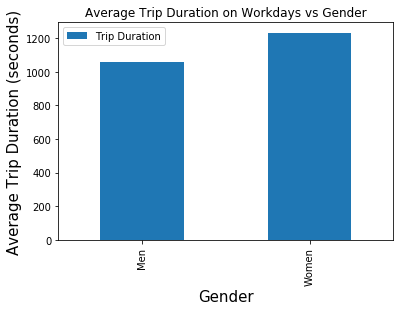

In [17]:
df2.plot.bar()
plt.title('Average Trip Duration on Workdays vs Gender')
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Average Trip Duration (seconds)', fontsize = 15)

Figure 1: The average trip time (in seconds) of men biking on weekdays is lower than the average trip time of women biking on weekdays, which means that we can accept the Null Hypotheses and conclude that women use Citibikes for longer duration of trips. Further analysis is requred to understand why - whether they are just slower than men or indeed the distances they cover are greater.   

In [18]:
#grouping data 
men = df.get_group(1)
women = df.get_group(2)

In [19]:
men.head()

,tripduration,gender,date
24691,1038,1,2013-06-03 00:07:13
24692,164,1,2013-06-03 00:07:28
24694,528,1,2013-06-03 00:12:04
24695,41984,1,2013-06-03 00:13:12
24696,121,1,2013-06-03 00:17:31


In [20]:
men = df.get_group(1).groupby([df.get_group(1).date.dt.weekday]).mean()['tripduration']
women = df.get_group(2).groupby([df.get_group(2).date.dt.weekday]).mean()['tripduration']

# Replace numerical weekdays with weekday names
daysofweek = dict(enumerate(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))
men.index = men.index.to_series().map(daysofweek)
women.index = women.index.to_series().map(daysofweek)

In [21]:
men.head()

date
Mon    1000.563626
Tue    1282.563687
Wed    1114.233265
Thu    1014.680194
Fri     864.432131
Name: tripduration, dtype: float64

Text(0,0.5,'Average Trip Duration (seconds)')

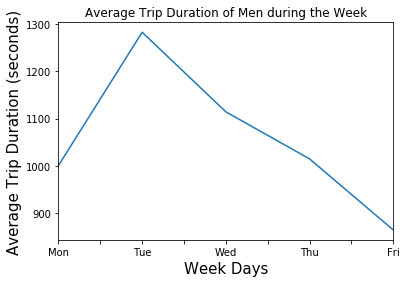

In [22]:
#further analysis - plotting the average trip duration of men during the week
men.plot()

plt.title('Average Trip Duration of Men during the Week')
plt.xlabel('Week Days', fontsize = 15)
plt.ylabel('Average Trip Duration (seconds)', fontsize = 15)

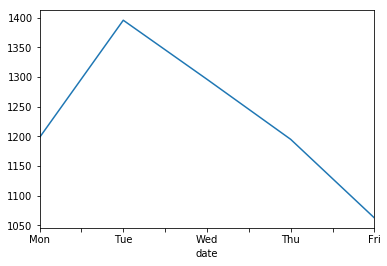

In [23]:
#further analysis - plotting the average trip duration of women during the week
women.plot()